# Generate trends / drift in time series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from badgers.generators.time_series.trends import GlobalAdditiveLinearTrendGenerator, AdditiveLinearTrendGenerator, RandomlySpacedLinearTrends

## Setup random generator

In [2]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Generate data (gaussian white noise)

In [3]:
X = pd.DataFrame(data=rng.normal(loc=0, scale=0.1, size=(100, 2)), columns=['dimension_0', 'dimension_1'])


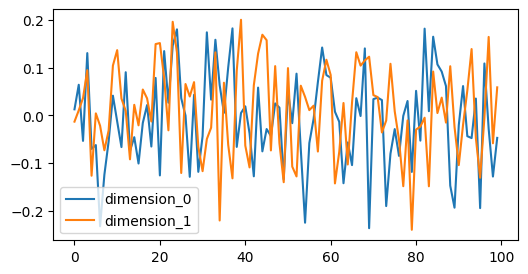

In [4]:
fig, ax = plt.subplots(1, sharex=True, sharey=True, figsize=(6,3))
X.plot(ax=ax);

## Add linear trend

In [5]:
generator = GlobalAdditiveLinearTrendGenerator(random_generator=rng)

In [6]:
slope = np.array([0.01,-0.02]) # slope: increase per time unit
Xt, _ = generator.generate(X, y=None, slope=slope)

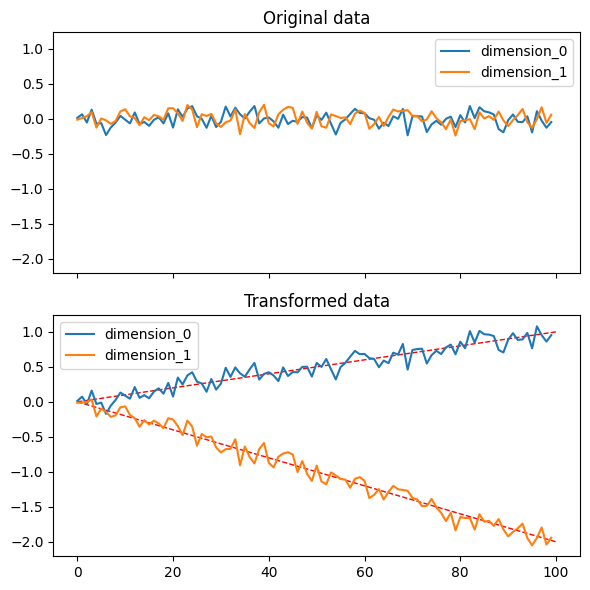

In [7]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
# first plot: original data
X.plot(ax=axes[0])
axes[0].set_title('Original data')

# second plot: transformed data
# visualizing added trends
axes[1].plot([0,len(X)],[0,len(X)*slope[0]], ls='--', linewidth=1, color='red')
axes[1].plot([0,len(X)],[0,len(X)*slope[1]], ls='--', linewidth=1, color='red')
Xt.plot(ax=axes[1])
axes[1].set_title('Transformed data')

plt.tight_layout();

## Add linear trend for a specific time interval

In [8]:
generator = AdditiveLinearTrendGenerator(random_generator=rng)

In [9]:
slope = np.array([0.01,-0.02])
start = 25
end = 75
Xt, _ = generator.generate(X, y=None, slope=slope, start=start, end=end)

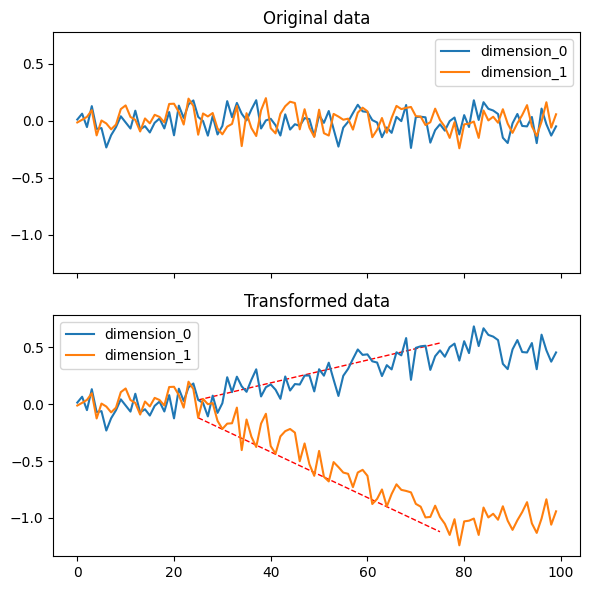

In [10]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
# first plot: original data
X.plot(ax=axes[0])
axes[0].set_title('Original data')

# second plot: transformed data
# visualizing added trends
axes[1].plot([start,end],[Xt.iloc[start,0],Xt.iloc[start,0] + (end-start)*slope[0]], ls='--', linewidth=1, color='red')
axes[1].plot([start,end],[Xt.iloc[start,1],Xt.iloc[start,1] + (end-start)*slope[1]], ls='--', linewidth=1, color='red')
Xt.plot(ax=axes[1])
axes[1].set_title('Transformed data')

plt.tight_layout();

## Adding linear trends (of random slopes) in randomly chosen time intervals

In [11]:
generator = RandomlySpacedLinearTrends(random_generator=rng)

In [12]:
Xt, _ = generator.generate(X, y=None, n_patterns=5, min_width_pattern=5, max_width_patterns=10, slope_min=-0.1, slope_max=0.1)

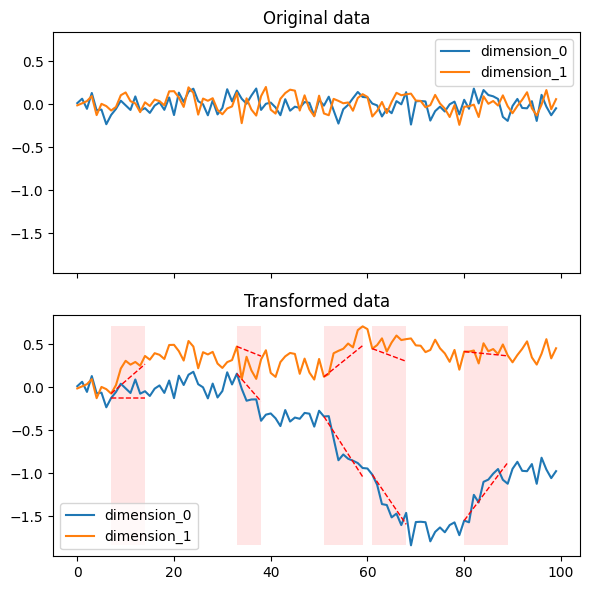

In [13]:
fig, axes = plt.subplots(2, sharex=True, sharey=True, figsize=(6,6))
# first plot: original data
X.plot(ax=axes[0])
axes[0].set_title('Original data')

# second plot: transformed data
Xt.plot(ax=axes[1])
axes[1].set_title('Transformed data')

# show where the patterns are located
bottom = np.min(Xt)
height = np.max(Xt) - np.min(Xt)
for (start, end), slope in zip(generator.patterns_indices_, generator.slopes_):
    # add red rectangle for visualizing the time interval
    width = end-start
    left = start
    rect = plt.Rectangle((left, bottom), width, height,
                         facecolor="red", alpha=0.1)
    axes[1].add_patch(rect)
    # vizualizing trends
    axes[1].plot([start,end],[Xt.iloc[start,0],Xt.iloc[start,0] + (end-start)*slope[0]], ls='--', linewidth=1, color='red')
    axes[1].plot([start,end],[Xt.iloc[start,1],Xt.iloc[start,1] + (end-start)*slope[1]], ls='--', linewidth=1, color='red')

plt.tight_layout();